In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/Tanjiaalam/carbon/main/data_cleanednew.csv')

In [ ]:

df['year'] = pd.to_datetime(df['year'], infer_datetime_format=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
print(enc)

OrdinalEncoder()


In [ ]:
enc.fit_transform(df[["country"]])

array([[ 0.],
       [ 1.],
       [ 2.],
       ...,
       [93.],
       [94.],
       [95.]])

In [ ]:
df[["country"]]=enc.fit_transform(df[["country"]])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories="auto")
encoder.fit(df)
encoder.transform(df)
df

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop,co2_per_cap
0,0.0,1991-01-01,417.4,5.449515,179.271884,565.451027,4367.397,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06,0.409949
1,1.0,1991-01-01,1594.0,0.076475,245.977706,12262.388130,57010.849,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06,29.851550
2,2.0,1991-01-01,2666.1,1.285579,173.122857,1434.960601,117021.304,426.614517,39.119646,4.772468,1.900000e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07,3.536073
3,4.0,1991-01-01,1603.3,1.306912,208.686644,4926.727783,281530.258,689.948873,60.356798,7.915273,3.300000e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07,16.288490
4,5.0,1991-01-01,5463.0,0.209142,128.939160,3381.073790,65888.656,322.186648,19.746121,20.991143,1.720000e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06,8.448456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,90.0,2008-01-01,5064.2,10.611056,266.177197,694.872260,127384.246,573.242319,12.016197,6.166789,9.027376e+10,920.0,25.2,1.064356,85122300.0,2.803530,2.369805e+07,1.496485
1696,92.0,2008-01-01,939.1,5.775544,142.167696,320.226397,23384.459,458.830121,9.356326,0.520661,2.691736e+10,970.0,81.1,3.049598,22626595.0,4.960694,6.932789e+06,1.033494
1697,93.0,2008-01-01,4055.3,3.503662,320.191040,3074.597450,435877.955,930.310881,33.234023,6.859550,2.750000e+11,5860.0,65.6,1.104057,48793022.0,1.897450,2.963688e+07,8.933203
1698,94.0,2008-01-01,771.5,14.798970,1193.887219,356.023405,2816.256,151.165020,17.352516,9.986567,1.166838e+10,160.0,174.4,2.763286,62474901.0,4.605834,2.121648e+07,0.045078


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0479f35e50>,
      dtype=object)

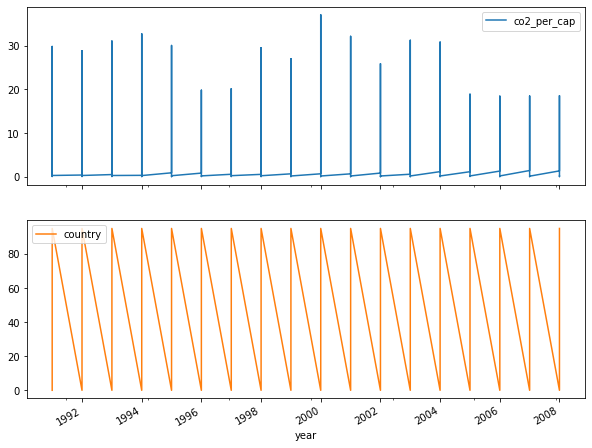

In [ ]:
df.set_index('year')[['co2_per_cap','country']].plot(subplots=True)

In [ ]:

df_input=df[['co2_per_cap','country']]

In [ ]:

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[1.02634331e-02, 0.00000000e+00],
       [8.04327973e-01, 1.05263158e-02],
       [9.45776004e-02, 2.10526316e-02],
       ...,
       [2.40142694e-01, 9.78947368e-01],
       [4.22565378e-04, 9.89473684e-01],
       [3.32115898e-03, 1.00000000e+00]])

In [ ]:
features=data_scaled
#features=df_input
target=data_scaled[:,0]


In [ ]:
target

array([1.02634331e-02, 8.04327973e-01, 9.45776004e-02, ...,
       2.40142694e-01, 4.22565378e-04, 3.32115898e-03])

In [ ]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.01026343, 0.        ],
         [0.80432797, 0.01052632]]]), array([0.0945776]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [ ]:
x_train.shape

(1360, 2)

In [ ]:
x_test.shape

(340, 2)

In [ ]:
win_length=230
batch_size=32
num_features=2
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [ ]:

train_generator[0]

(array([[[0.01026343, 0.        ],
         [0.80432797, 0.01052632],
         [0.0945776 , 0.02105263],
         ...,
         [0.06076976, 0.55789474],
         [0.02835714, 0.56842105],
         [0.10255093, 0.57894737]],
 
        [[0.80432797, 0.01052632],
         [0.0945776 , 0.02105263],
         [0.43852092, 0.04210526],
         ...,
         [0.02835714, 0.56842105],
         [0.10255093, 0.57894737],
         [0.0668465 , 0.58947368]],
 
        [[0.0945776 , 0.02105263],
         [0.43852092, 0.04210526],
         [0.22706868, 0.05263158],
         ...,
         [0.10255093, 0.57894737],
         [0.0668465 , 0.58947368],
         [0.07071542, 0.6       ]],
 
        ...,
 
        [[0.00637606, 0.35789474],
         [0.17695091, 0.36842105],
         [0.01413237, 0.37894737],
         ...,
         [0.07698449, 0.86315789],
         [0.00173269, 0.87368421],
         [0.2814856 , 0.88421053]],
 
        [[0.17695091, 0.36842105],
         [0.01413237, 0.37894737],
       

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.2)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2)) 
model.add(tf.keras.layers.Dense(1))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


<ipython-input-27-3b00c92e395b>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50,


36/36 [==============================] - 41s 971ms/step - loss: 0.0196 - mean_absolute_error: 0.1066 - val_loss: 0.0142 - val_mean_absolute_error: 0.0944
Epoch 2/50
36/36 [==============================] - 33s 912ms/step - loss: 0.0183 - mean_absolute_error: 0.1040 - val_loss: 0.0141 - val_mean_absolute_error: 0.0943
Epoch 3/50
36/36 [==============================] - 32s 892ms/step - loss: 0.0183 - mean_absolute_error: 0.1039 - val_loss: 0.0140 - val_mean_absolute_error: 0.0927
Epoch 4/50
36/36 [==============================] - 33s 918ms/step - loss: 0.0183 - mean_absolute_error: 0.1035 - val_loss: 0.0138 - val_mean_absolute_error: 0.0910
Epoch 5/50
36/36 [==============================] - 32s 883ms/step - loss: 0.0179 - mean_absolute_error: 0.1025 - val_loss: 0.0136 - val_mean_absolute_error: 0.0888
Epoch 6/50
36/36 [==============================] - 34s 939ms/step - loss: 0.0175 - mean_absolute_error: 0.1005 - val_loss: 0.0133 - val_mean_absolute_error: 0.0869
Epoch 7/50
36/36 [===

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-28-a68ec1088d46>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.012719179503619671, 0.08438749611377716]

In [ ]:
predictions=model.predict_generator(test_generator)

<ipython-input-29-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [ ]:
x_test[:,1:][win_length:]

array([[0.84210526],
       [0.85263158],
       [0.86315789],
       [0.87368421],
       [0.88421053],
       [0.89473684],
       [0.90526316],
       [0.91578947],
       [0.92631579],
       [0.93684211],
       [0.94736842],
       [0.95789474],
       [0.96842105],
       [0.97894737],
       [0.98947368],
       [1.        ],
       [0.        ],
       [0.02105263],
       [0.03157895],
       [0.04210526],
       [0.05263158],
       [0.06315789],
       [0.07368421],
       [0.08421053],
       [0.09473684],
       [0.10526316],
       [0.11578947],
       [0.12631579],
       [0.13684211],
       [0.14736842],
       [0.15789474],
       [0.16842105],
       [0.17894737],
       [0.18947368],
       [0.2       ],
       [0.21052632],
       [0.22105263],
       [0.23157895],
       [0.24210526],
       [0.25263158],
       [0.26315789],
       [0.27368421],
       [0.28421053],
       [0.29473684],
       [0.30526316],
       [0.31578947],
       [0.32631579],
       [0.336

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:

rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]


In [ ]:
df_final.count()

co2_per_cap    110
country        110
dtype: int64

In [ ]:
df_final['CarbonPred']=rev_trans[:,0]

<ipython-input-35-7cfe78cf29af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CarbonPred']=rev_trans[:,0]


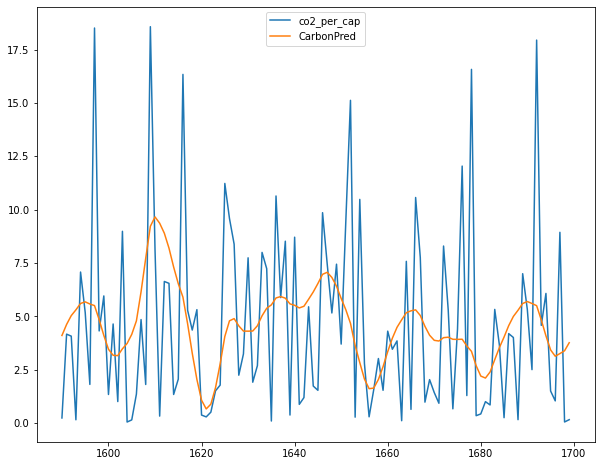

In [ ]:
df_final[['co2_per_cap','CarbonPred']].plot()